In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

import cv2
# remove verison errors
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

2025-04-27 16:17:38.909714: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-27 16:17:38.954267: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-27 16:17:38.954867: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-27 16:17:39.801351: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
gpu = tf.config.experimental.list_physical_devices('GPU')
for g in gpu:
    tf.config.experimental.set_memory_growth(g, True)
len(gpu) # Check if GPU is available

2025-04-27 16:17:40.767455: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-27 16:17:40.805913: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


0

# Reading the Images

glob is a Python module used to find all the file names in a folder that match a specific pattern (like *.jpg for all JPEG images)

    - glob helps you quickly search for files or folders matching a pattern.


In [4]:
normal = glob('/home/yuk/Documents/BigProject/Dataset/Normal/*.png')
tuberculosis = glob('/home/yuk/Documents/BigProject/Dataset/Tuberculosis/*.png')

In [5]:
img_nor = plt.imread(normal[69])
img_tub = cv2.imread(tuberculosis[49])
img_nor.shape , img_tub.shape

((512, 512, 3), (512, 512, 3))

img_nor.shape ---> (512, 512, 3)
img_tub.shape ---> (512, 512, 3)

(Height , Width , Channels)

# Display Images

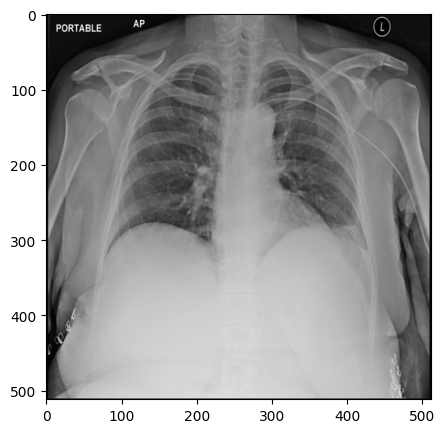

In [6]:
fig , ax = plt.subplots(figsize=(5,5))
ax.imshow(img_nor) # Image of a normal lung without TB  
plt.show()

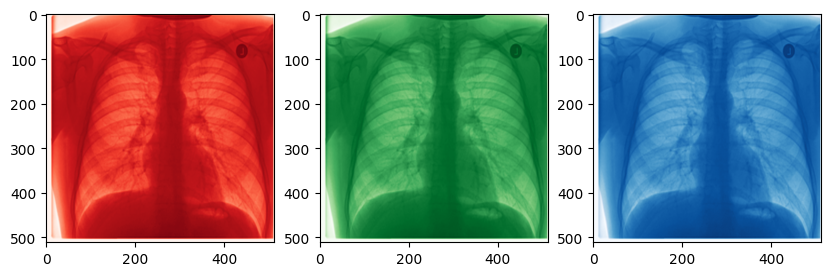

In [7]:
fig, axs = plt.subplots(1 ,3 , figsize=(10, 5))
axs[0].imshow(img_tub[:,:,0], cmap='Reds') 
axs[1].imshow(img_tub[:,:,1], cmap='Greens') 
axs[2].imshow(img_tub[:,:,2], cmap='Blues')
plt.show()  

In [8]:
from skimage import exposure , img_as_float

image1 = img_as_float(img_nor)
image2 = img_as_float(img_tub)

gamma_corrected1 = exposure.adjust_gamma(image1, 0.5)
gamma_corrected2 = exposure.adjust_gamma(image2, 0.5)

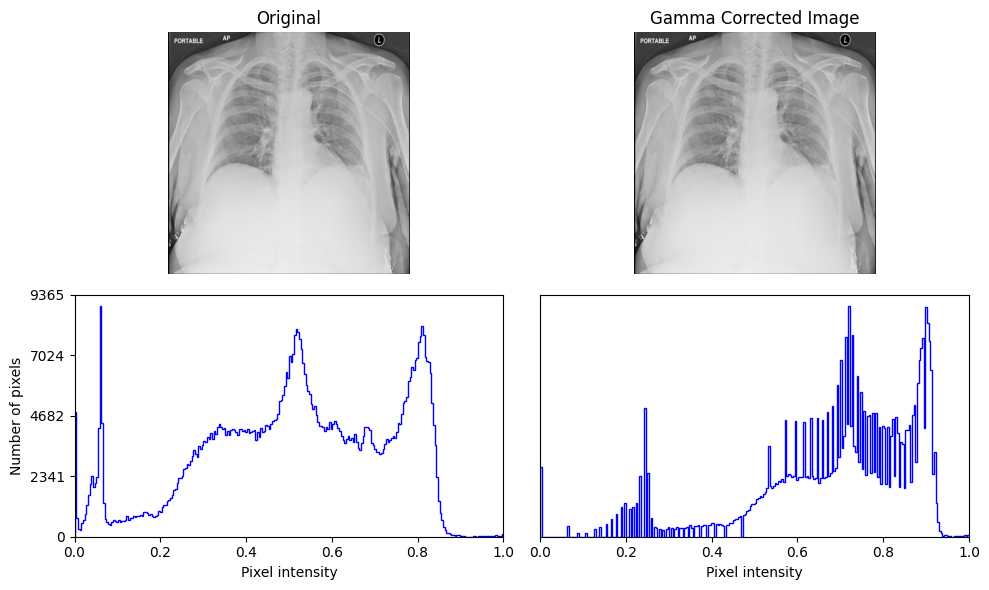

In [9]:
# Display the original and gamma_corrected images side by side
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
ax = axes.ravel()

ax[0].imshow(gamma_corrected1, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(gamma_corrected1, cmap=plt.cm.gray)
ax[1].set_title('Gamma Corrected Image')
ax[1].set_axis_off()

ax[2].hist(image1.ravel(), bins=256, histtype='step', color='blue')
ax[2].set_xlim(0, 1)
ax[2].set_xlabel('Pixel intensity')
ax[2].set_yticks([])
ax[2].set_ylabel('Number of pixels')
y_min, y_max = ax[2].get_ylim()
ax[2].set_yticks(np.linspace(0, y_max, 5))

ax[3].hist(gamma_corrected1.ravel(), bins=256, histtype='step', color='blue')
ax[3].set_xlim(0, 1)
ax[3].set_xlabel('Pixel intensity')
ax[3].set_yticks([])

plt.tight_layout()
plt.show()

In the normal lung X-ray graph (top image), we can see that the blue line forms three distinct humps or peaks-one small peak at the far left, a medium peak in the middle, and a taller peak on the right. This pattern shows that healthy lungs have a good mix of different brightness levels, representing the natural contrast between air-filled areas (darker) and tissue/bone structures (brighter). After gamma correction, these brightness values spread out into a pattern that looks like a comb with many spikes, but still maintain the overall shape with multiple peaks, showing the lung's normal varied texture.

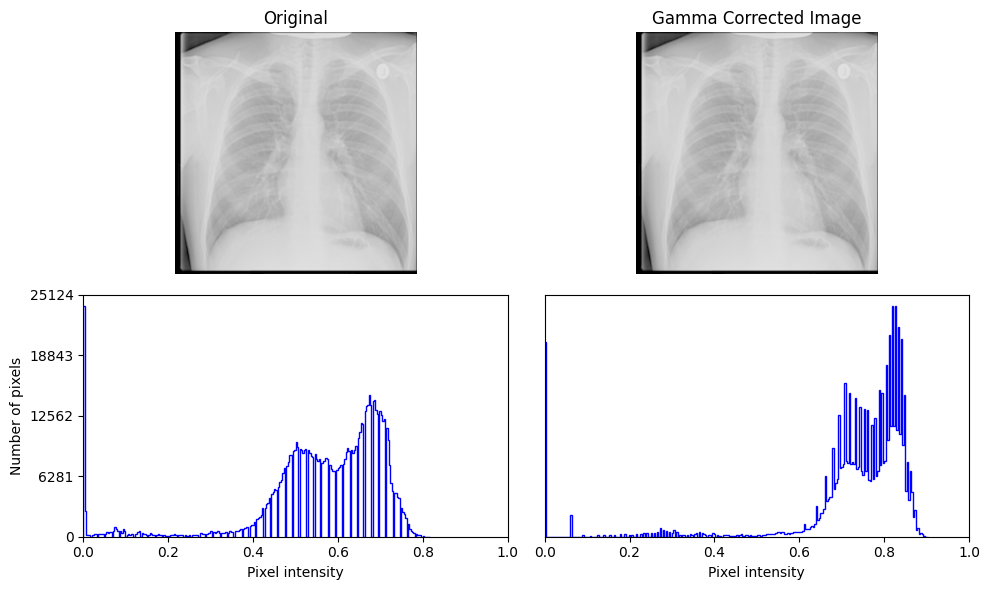

In [10]:
# Display the original and gamma_corrected images side by side
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
ax = axes.ravel()

ax[0].imshow(gamma_corrected2, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(gamma_corrected2, cmap=plt.cm.gray)
ax[1].set_title('Gamma Corrected Image')
ax[1].set_axis_off()

ax[2].hist(image2.ravel(), bins=256, histtype='step', color='blue')
ax[2].set_xlim(0, 1)
ax[2].set_xlabel('Pixel intensity')
ax[2].set_yticks([])
ax[2].set_ylabel('Number of pixels')
y_min, y_max = ax[2].get_ylim()
ax[2].set_yticks(np.linspace(0, y_max, 5))

ax[3].hist(gamma_corrected2.ravel(), bins=256, histtype='step', color='blue')
ax[3].set_xlim(0, 1)
ax[3].set_xlabel('Pixel intensity')
ax[3].set_yticks([])

plt.tight_layout()
plt.show()

In the tuberculosis (TB) lung X-ray graph (bottom image), the most noticeable difference is how the brightness values are more concentrated into one main mountain-shaped area in the middle-right side of the graph, with a tall spike at the far left. This shows that TB causes more uniform density in the lungs as infection creates areas that appear similar in brightness. After gamma correction, the TB lung's histogram shifts dramatically to the right side with tall, regular spikes, indicating that the diseased tissue becomes more uniformly bright. This difference in patterns helps doctors and computers distinguish between healthy lungs and those affected by tuberculosis.

Normal Lung (first set):
The graph for the healthy lung shows a wide and balanced spread of pixel brightness, with several peaks. This means the lung tissue is varied and air spaces are clear, which is typical for healthy lungs. The pattern reflects normal, well-aerated lung structure.

TB Lung (second set):
The TB lung graph is more concentrated in the middle and right, with fewer peaks and a more uniform shape. This indicates the lung tissue is denser and less varied, which happens when infection or scarring fills the air spaces. This pattern is a sign of disease affecting the lung’s normal structure.

# Loading Images with Keras Utilities

In [11]:
data = tf.keras.utils.image_dataset_from_directory(
    '/home/yuk/Documents/BigProject/Dataset',
    image_size=(256, 256),
    batch_size=32,
    color_mode='grayscale'  
)

Found 1700 files belonging to 2 classes.


This turns the TensorFlow dataset data into a NumPy-style iterator, so you can loop through the data and get batches as normal NumPy arrays.

    - We need this because it does not load data directly into the memory , so we just have to use the iterator to convert them into normal numpy array such as ex (x,y)

In [12]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [13]:
batch = data_iterator.next()
# Images represented as a numpy array and labels represented as a numpy array
batch[0].shape , batch[1].shape 

((32, 256, 256, 1), (32,))

class 1 contains TB ,
class 0 Does not contain any TB

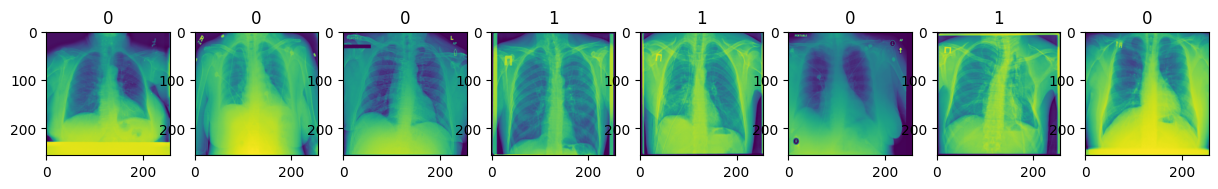

In [14]:
fig , ax = plt.subplots(ncols=8 , figsize=(15,15))
for idx , img in enumerate(batch[0][:8]): # Gets first 8 images
    ax[idx].imshow(img.astype(int))       
    ax[idx].set_title(batch[1][idx]) # Gets the first 8 labels as well

In [15]:
batch[1] # Labels 

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int32)

In [16]:
batch[0].max() # Check the max value of the labels

255.0

# Normalizing

Adjusting the pixel intensity for better image processing , scaling
the values to [0 , 1]

In [17]:
from tensorflow.keras import layers 

IMG_SIZE = 128  

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

def preproce_rescaling(image , label):
    image = resize_and_rescale(image)
    return image , label

data = data.map(preproce_rescaling)

In [18]:
for image, label in data.take(1):
    print("Min pixel value:", tf.reduce_min(image).numpy())
    print("Max pixel value:",tf.reduce_max(image).numpy()) 

Min pixel value: 0.0
Max pixel value: 1.0


# CLAHE (Contrast Limited Adaptive Histogram Equalization)

This process improves the contrast in each image, making the details inside the lungs clearer and more visible.

In [19]:
from tensorflow import keras

In [24]:
import tf_clahe
@tf.function(experimental_compile=True)  # Enable XLA
def fast_clahe(img):
    return tf_clahe.clahe(img, gpu_optimized=True)

data = data.map(
    lambda image, label: (tf_clahe.clahe(image), label)
)

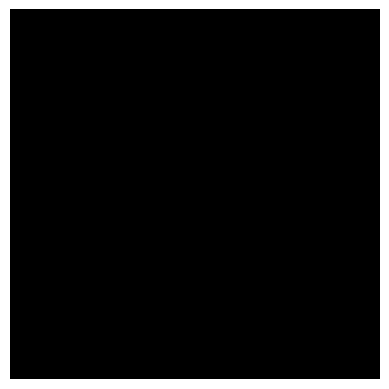

In [25]:
for images, labels in data.take(1):
    plt.imshow(images[0].numpy().squeeze(), cmap='gray')
    plt.axis('off')
    plt.show()
    break

# Data Augmentation

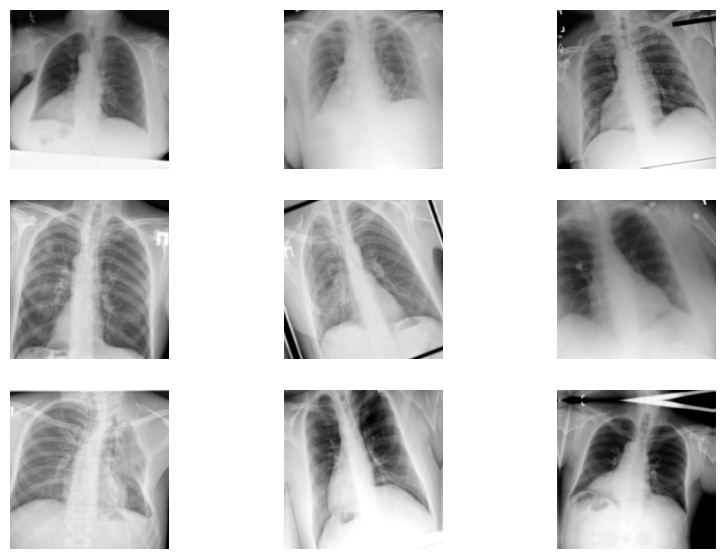

In [22]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.06),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomContrast(0.3),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomBrightness(0.1),  
    tf.keras.layers.RandomCrop(350, 350),
])

plt.figure(figsize=(10, 7))
for i in range(9):
    augmented_image = data_augmentation(batch[0][i])  # Using batch[0] to access images
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image.numpy().astype("uint8"),cmap='gray')  
    plt.axis("off")